In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/datasets/brendan45774/test-file/tested.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing  import FunctionTransformer
from sklearn.compose import ColumnTransformer

In [3]:
df = pd.read_csv('/kaggle/input/datasets/brendan45774/test-file/tested.csv',usecols=['Age','Fare','Survived'])
df

,Survived,Age,Fare
0,0,34.5,7.8292
1,1,47.0,7.0000
2,0,62.0,9.6875
3,0,27.0,8.6625
4,1,22.0,12.2875
...,...,...,...
413,0,NaN,8.0500
414,1,39.0,108.9000
415,0,38.5,7.2500
416,0,NaN,8.0500


In [4]:
df.isnull().sum()

Survived     0
Age         86
Fare         1
dtype: int64

In [5]:
df['Age'] = df['Age'].fillna(df['Age'].mean())


In [6]:
df['Fare'] = df['Fare'].fillna(df['Fare'].mean())

In [7]:
df.head()

,Survived,Age,Fare
0,0,34.5,7.8292
1,1,47.0,7.0000
2,0,62.0,9.6875
3,0,27.0,8.6625
4,1,22.0,12.2875


In [8]:
X = df.iloc[:,1:3]
y = df.iloc[:,0]

In [9]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

/tmp/ipykernel_17/779009019.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['Age'])


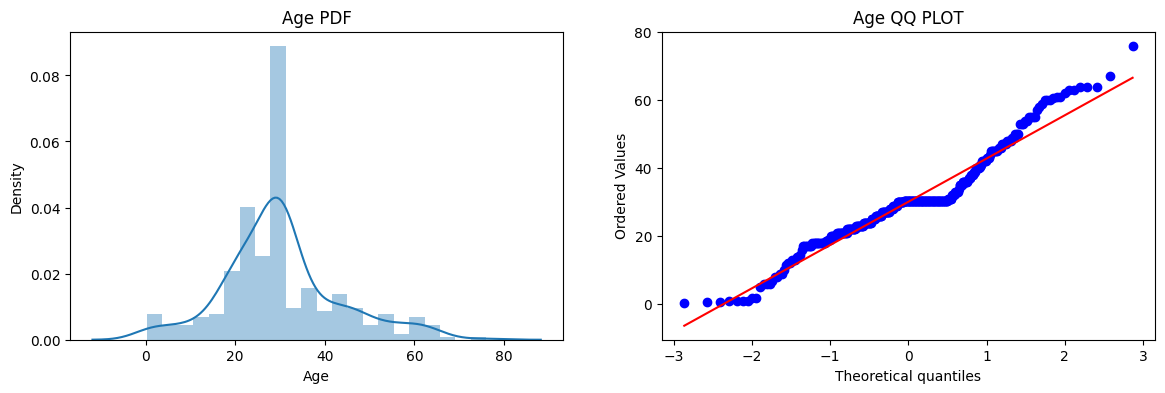

In [10]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(X_train['Age'])
plt.title('Age PDF')

## QQ PLOT
plt.subplot(122)
stats.probplot(X_train['Age'],dist='norm',plot=plt)
plt.title('Age QQ PLOT')
plt.show()

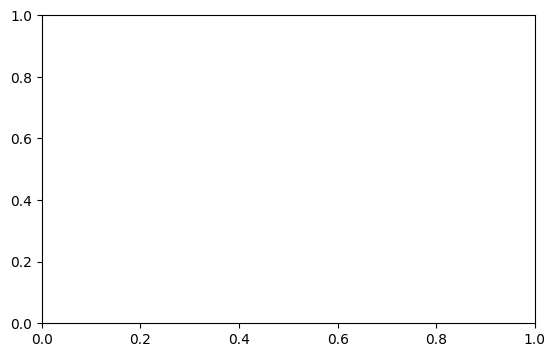

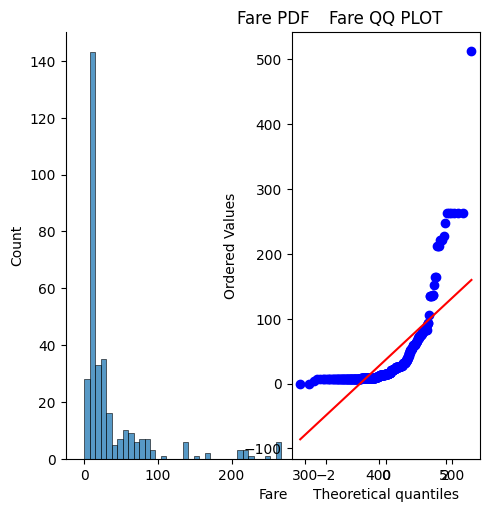

In [11]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.displot(X_train['Fare'])
plt.title('Fare PDF')

## QQ PLOT
plt.subplot(122)
stats.probplot(X_train['Fare'],dist='norm',plot=plt)
plt.title('Fare QQ PLOT')
plt.show()

In [12]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()


In [13]:
clf.fit(X_train,y_train)
clf2.fit(X_train,y_train)

DecisionTreeClassifier()

In [14]:
y_pred = clf.predict(X_test)
y_pred1 = clf2.predict(X_test)

In [15]:
print("Accuracy LR",accuracy_score(y_test,y_pred))
print("Accuracy DT",accuracy_score(y_test,y_pred1))

Accuracy LR 0.6071428571428571
Accuracy DT 0.5357142857142857


In [16]:
trf = FunctionTransformer(func=np.log1p)


In [17]:
X_train_transformed = trf.fit_transform(X_train)
X_test_transformed = trf.transform(X_test)

In [18]:
X_train_transformed = trf.fit_transform(X_train)
X_test_transformed = trf.transform(X_test)

In [19]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

clf.fit(X_train_transformed, y_train)
clf2.fit(X_train_transformed, y_train)


DecisionTreeClassifier()

In [20]:
y_pred = clf.predict(X_test_transformed)
y_pred_1 = clf2.predict(X_test_transformed)

print("Accuracy LR",accuracy_score(y_test,y_pred))
print("Accuracy DT",accuracy_score(y_test,y_pred1))

Accuracy LR 0.6190476190476191
Accuracy DT 0.5357142857142857


In [21]:
X_transformed = trf.fit_transform(X)

clf = LogisticRegression()
clf1 = DecisionTreeClassifier()

print("LR",np.mean(cross_val_score(clf,X_transformed,y,scoring='accuracy',cv=10)))
print("DT",np.mean(cross_val_score(clf2,X_transformed,y,scoring='accuracy',cv=10)))

LR 0.6556329849012775
DT 0.5885598141695703


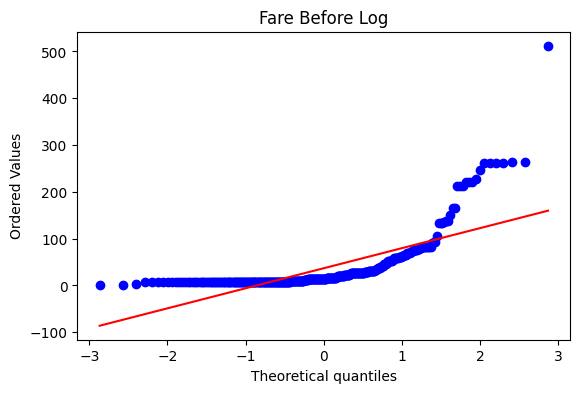

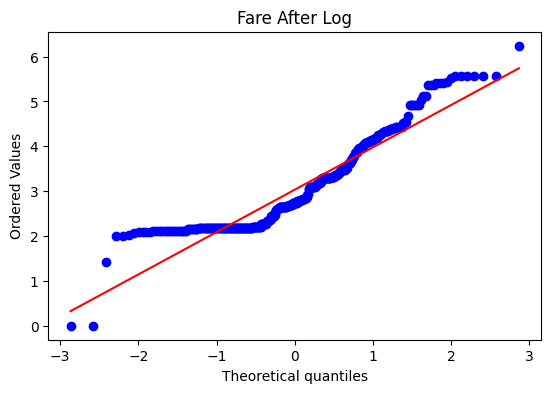

In [22]:
plt.figure(figsize=(14,4))
plt.subplot(121)
stats.probplot(X_train['Fare'],dist='norm',plot=plt)
plt.title("Fare Before Log")

plt.figure(figsize=(14,4))
plt.subplot(122)
stats.probplot(X_train_transformed['Fare'],dist='norm',plot=plt)
plt.title("Fare After Log")
plt.show()


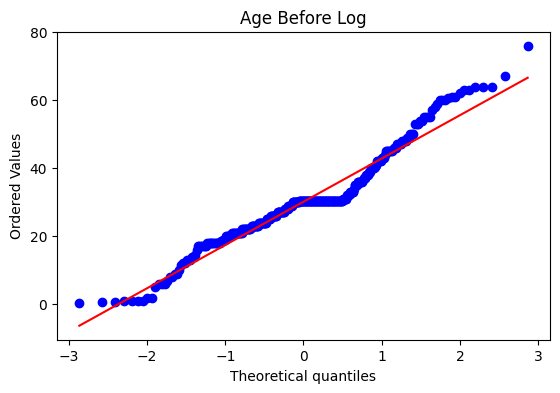

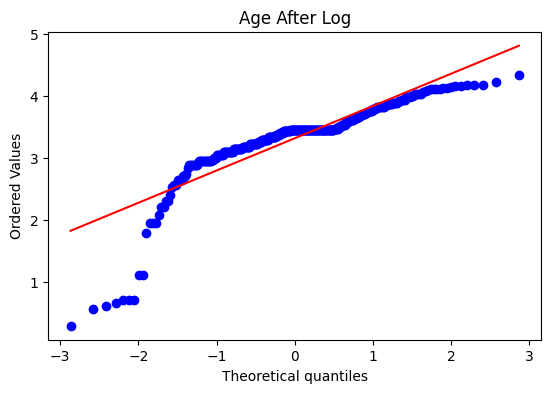

In [23]:
plt.figure(figsize=(14,4))
plt.subplot(121)
stats.probplot(X_train['Age'],dist='norm',plot=plt)
plt.title("Age Before Log")

plt.figure(figsize=(14,4))
plt.subplot(122)
stats.probplot(X_train_transformed['Age'],dist='norm',plot=plt)
plt.title("Age After Log")
plt.show()


## Only we are Doing in Fare Column 

In [24]:
trf2 = ColumnTransformer([('log',FunctionTransformer(np.log1p),['Fare'])],remainder='passthrough')
X_train_transformed2 = trf2.fit_transform(X_train)
X_test_transformed2 = trf2.transform(X_test)

In [25]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

clf.fit(X_train_transformed2,y_train)
clf2.fit(X_train_transformed2,y_train)

y_pred = clf.predict(X_test_transformed2)
y_pred_2 = clf.predict(X_test_transformed2)

print("Accuracy LR",accuracy_score(y_test,y_pred))
print("Accuracy DT",accuracy_score(y_test,y_pred_2))

Accuracy LR 0.6190476190476191
Accuracy DT 0.6190476190476191


In [26]:
X_transformed2 = trf2.fit_transform(X)

clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

print("LR",np.mean(cross_val_score(clf,X_transformed2,y,scoring='accuracy',cv=10)))
print("DT",np.mean(cross_val_score(clf2,X_transformed2,y,scoring='accuracy',cv=10)))

LR 0.6507549361207897
DT 0.5837398373983739


## IT FIND ACCURACY

In [27]:
def apply_transform(transform):
    X= df.iloc[:,1:3]
    y= df.iloc[:,0]
    trf = ColumnTransformer([('log',FunctionTransformer(transform),['Fare'])],remainder='passthrough')
    X_trans = trf.fit_transform(X)
    clf = LogisticRegression()
    print("Accuracy",np.mean(cross_val_score(clf,X_trans,y,scoring='accuracy',cv=10)))
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    stats.probplot(X['Fare'],dist="norm",plot=plt)
    plt.title("Fare Before Transform")

    plt.subplot(122)
    stats.probplot(X_trans[:,0],dist="norm",plot=plt)
    plt.title("Fare After Transform")
    plt.show()


Accuracy 0.6483739837398372


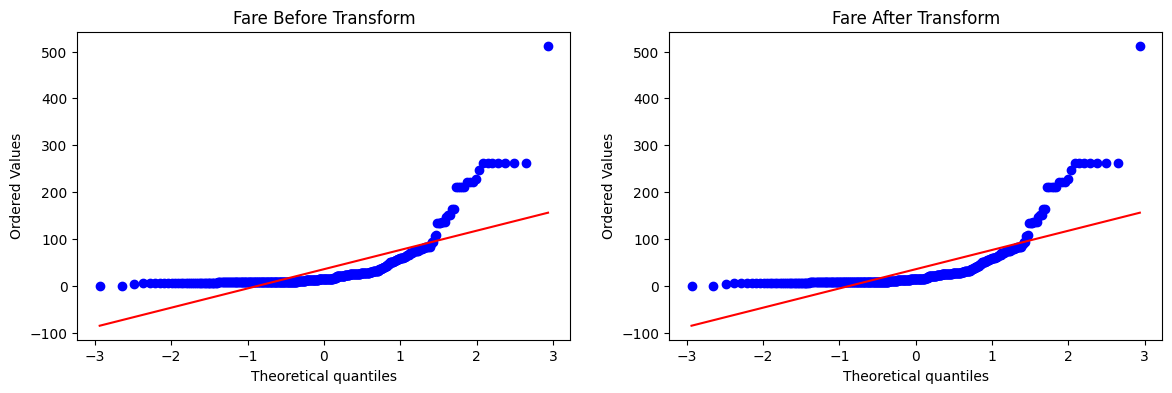

In [28]:
apply_transform(lambda x: x)

Accuracy 0.6506968641114981


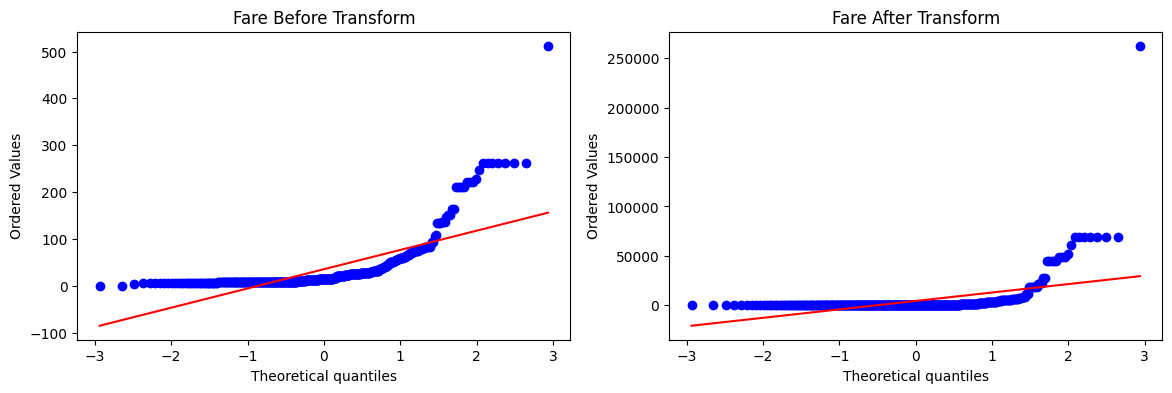

In [29]:
apply_transform(lambda x: x**2) ## Square Transform

Accuracy 0.6483739837398372


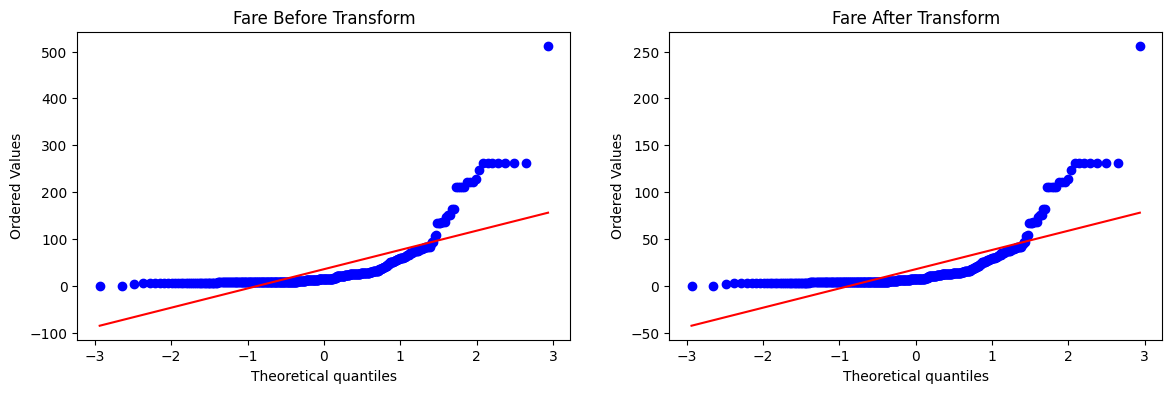

In [30]:
apply_transform(lambda x: x**1/2) ## Square Root

Accuracy 0.6363530778164923


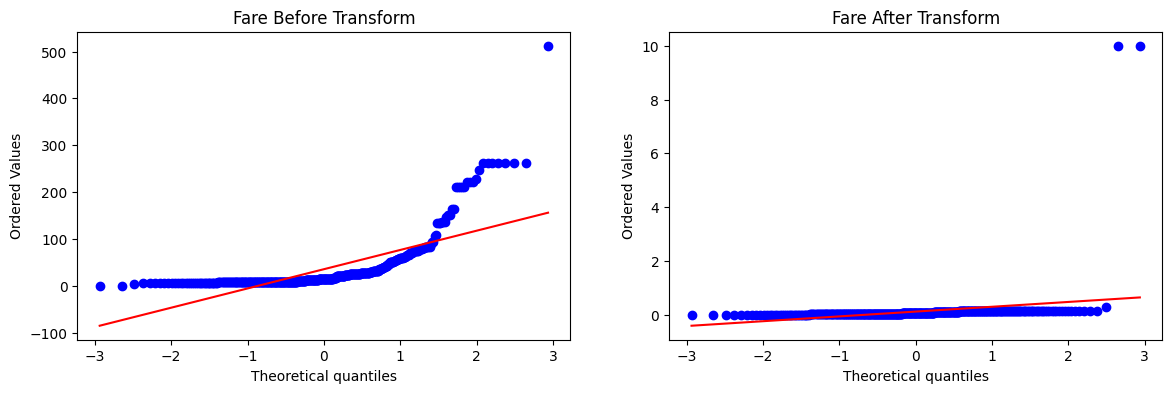

In [31]:
apply_transform(lambda x: 1/(x+0.1))

Accuracy 0.6363530778164923


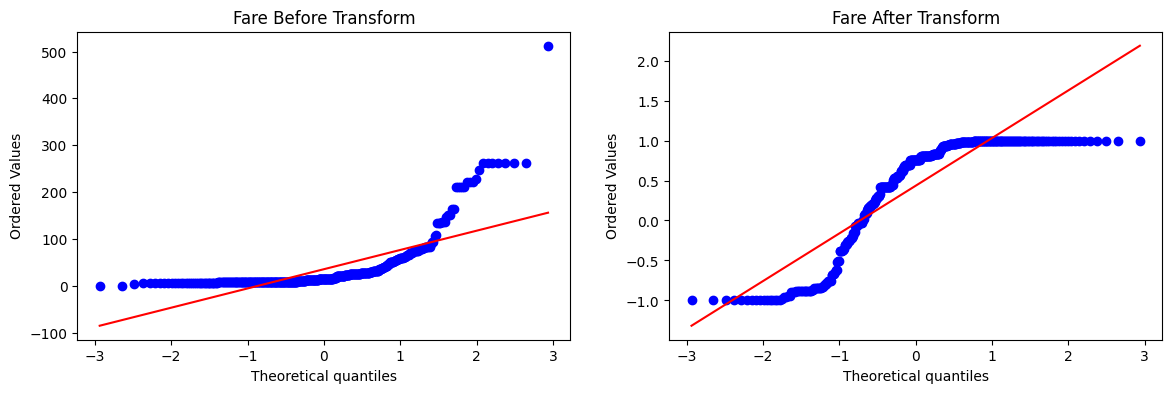

In [32]:
apply_transform(np.sin)

Accuracy 0.6363530778164923


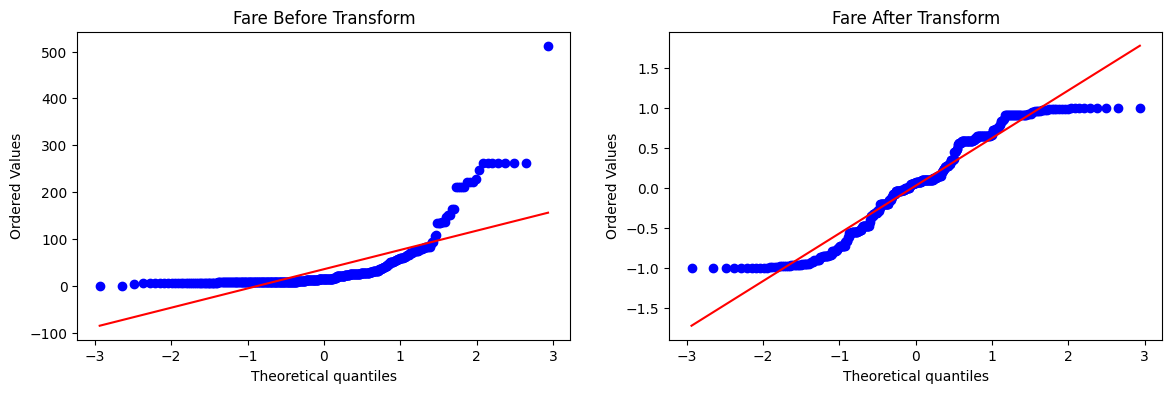

In [33]:
apply_transform(np.cos)

Accuracy 0.6363530778164923


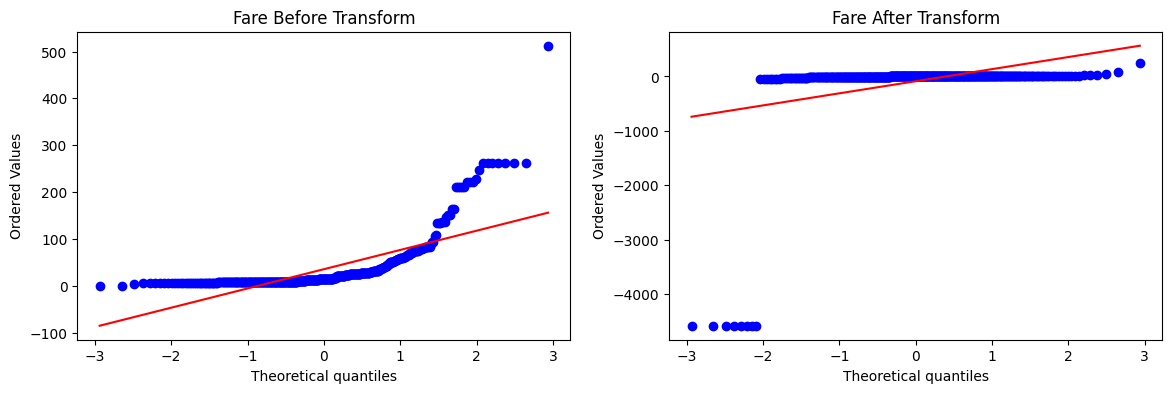

In [34]:
apply_transform(np.tan)